In [1]:
from skimage.transform import downscale_local_mean
from skimage.io import imread,imsave
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import scipy.signal as ss
import os
from sklearn.decomposition import NMF

In [2]:
img = imread('/Users/zhengj10/Desktop/iGluSnFR/Mini/230207_Plate_003_633.217_FOV_00006.tif')
img.shape
np.min(img)

1585

In [3]:
img = downscale_local_mean(img,(1,4,4))
img.shape
# img = img-img[-1,:,:]+400
# np.min(img)

(6000, 128, 128)

In [4]:
# np.min(img)
# t.shape

In [5]:
F0 = img[0,:,:]
Fb = np.min(img,axis=0)
Fb.shape

(128, 128)

In [6]:
img = img-Fb
np.min(img)

0.0

In [7]:
img_dff = (img-F0)/(F0-Fb)
img_dff.shape
# img_hp = img

(6000, 128, 128)

In [8]:
b,a = ss.butter(2, 0.002, btype='high')
img_hp = ss.filtfilt(b,a,img_dff,axis=0,padlen=None)
img_hp.shape
np.min(img_hp)

-4.666068434222436

In [9]:
np.max(img_hp)

13.115682023409146

In [10]:
img_hp+=9
img_hp*=1000

In [11]:
np.min(img_hp)

4333.931565777564

In [12]:
# img_hp.shape
# imsave('/Users/zhengj10/Desktop/img_hp.tif',img_hp)

In [13]:
img_hp = np.reshape(img_hp,(6000,128*128))
img_hp.shape

(6000, 16384)

In [14]:
img_hp = np.transpose(img_hp)
# img_hp.shape
# img_hp = img_hp-img_hp[-1,:]+200
np.min(img_hp)

4333.931565777564

In [ ]:
plt.figure(figsize=[7,18])
plt.imshow(img_hp,cmap='gray')

In [ ]:
# img_hp.shape
# np.max(img_hp)
plt.hist(img_hp)

In [15]:
model = NMF(n_components=25,init='random',random_state=0,max_iter=200)
print('fuck')
W = model.fit_transform(img_hp)
print('fuck')
H = model.components_

fuck
fuck


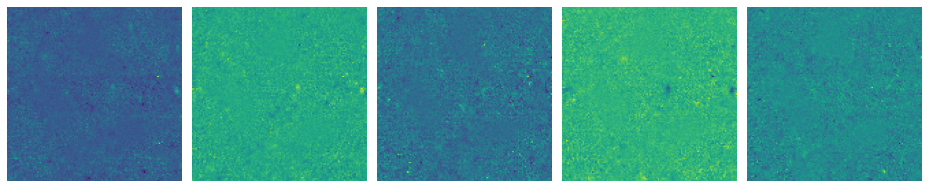

In [24]:
plt.figure(figsize=[13,13])
for i in range(5):
    ax = plt.subplot(1,5,i+1)
    ax.imshow(np.reshape(W[:,i],(128,128)))
    ax.axis('off')
plt.tight_layout()
plt.show()
# W_all = []
# for i in range(25):
#     W_all.append(W[:,i].reshape(128,128)>0.8*np.max(W[:,i]))
# np.array(W_all).shape

In [26]:
# W.shape
img.shape

(6000, 128, 128)

In [19]:
w = W[:,0].reshape(128,128)
F = []
for i in range(img.shape[0]):
    f = np.sum((w>np.max(w)/2)*img[i,:,:])
    F.append(f)

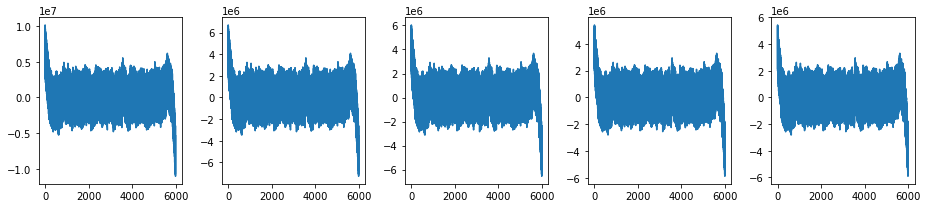

In [33]:
plt.figure(figsize=[13,3])
for c in range(5):
    w = W[:,c].reshape(128,128)
    F = []
    for i in range(img.shape[0]):
        f = np.sum(w*img[i,:,:])
        F.append(f)
    b,a = ss.butter(2, 0.002, btype='high')
    img_hp = ss.filtfilt(b,a,F,padlen=None)
    ax = plt.subplot(1,5,c+1)
    ax.plot(img_hp)
plt.tight_layout()
plt.show()

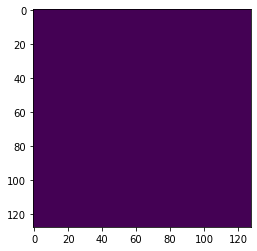

In [28]:
plt.imshow(w>np.max(w)/2)

In [30]:
np.min(w)

38.76240155722852

In [ ]:
def isNaN(A):
    return A!=A

In [ ]:
thre = 1
imgData = img_rs
F0 = imgData[0,:,:].astype('float16')
Fb = np.min(imgData.astype('float16'))
dFF = (imgData.astype('float16')-F0.astype('float16'))/(F0.astype('float16')-Fb)

dFF_diff = np.diff(dFF, axis=0)
plt.figure(figsize=[8,8])
act_pix = np.max(dFF_diff,axis=0)>0.4
# bg = imgData[-1,:,:]>Fb+500
# act_pix = bg*act_pix

plt.figure(figsize=[8,8])
plt.imshow(act_pix,cmap='gray',vmax=0.5)

contours = measure.find_contours(act_pix, 0.5)
for contour in contours:
    if contour.shape[0]>thre:
        plt.plot(contour[:,1], contour[:,0], color = 'r',lw=1)
plt.tight_layout()
# plt.savefig(os.path.join(imgPath,date,'summary')+'\\ROI_%s.svg' %os.path.basename(imgFile)[:-4],format='svg')
plt.show()
plt.close()


Fb = np.min(imgData[-1,:,:]).astype('float16')
F0 = np.mean(imgData[:5,:,:],axis=0).astype('float16')

rois = []
for contour in contours:
    if contour.shape[0]>thre and contour.shape[0]<10*thre:
        p = Path(contour)
        roi = p.contains_points(coordinates)
        roi = roi.reshape(128,128)
        rois.append(roi)

fig = plt.figure(figsize=[12,len(rois)/5])
y_shift = 0
x = np.arange(1,imgData.shape[0]+1)
for roi in range(len(rois)):
    
    offset = y_shift
    
    F = np.sum(rois[roi]*imgData,axis=1)
    F = np.sum(F,axis=1)
    dFF_all = (F - np.sum(rois[roi]*F0)/np.sum(rois[roi]))/(np.sum(rois[roi]*F0)/np.sum(rois[roi])-Fb)
#     print(dFF_all.shape)
    
#     dFF_all = []
#     for frame in range(imgData.shape[0]):

#         F_single = np.sum(rois[roi]*imgData[frame,:,:])/np.sum(rois[roi])
#         dFF = (F_single - np.sum(rois[roi]*F0)/np.sum(rois[roi]))/(np.sum(rois[roi]*F0)/np.sum(rois[roi])-Fb)
#         dFF_all.append(dFF)  
#     dFF_all = np.array(dFF_all)

    b, a = ss.butter(2, 0.002, btype='high')
    dFF_hp_filt = ss.filtfilt(b, a, dFF_all,padlen=None)
    peaks,_ = ss.find_peaks(dFF_hp_filt,height=0.2)

    if isNaN(np.mean(dFF_hp_filt)):
        continue
    plt.fill_between(x,dFF_hp_filt - offset, 0 - offset, zorder=y_shift+1, facecolor='w', edgecolor='w', lw=0, 
                     closed=True)
    plt.plot(x,dFF_hp_filt - offset,zorder=y_shift+1, color='k', lw=1)
    plt.title('%s' %np.std(dFF_hp_filt[:50]))
#         plt.scatter(peaks,dFF_all[peaks] - offset,color='m')
#     plt.axis('off')
    y_shift+=1            
plt.tight_layout()
# sumPath = os.path.join(imgPath,date,'summary')
# if not os.path.exists(sumPath):
#     os.makedirs(sumPath)
# plt.savefig(sumPath+'\\dFF_traces_%s.svg' %os.path.basename(imgFile)[:-4],format='svg')
plt.show()
plt.close()

In [ ]:
imgData_rs = np.reshape(imgData,(6000,128*128))
imgData_rs.shape

In [ ]:
plt.imshow(imgData_rs,vmax=3000)

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
F = []
for f in range(imgData_hp_filt.shape[0]):
    frame = np.ndarray.flatten(imgData_hp_filt[f,:,:])
    F.append(frame)

In [ ]:
imgData_rs = np.transpose(F)
imgData_rs.shape

In [ ]:
plt.figure(figsize=[10,30])
plt.imshow(imgData_rs+400,vmax=750)

In [ ]:
W.shape
# np.max(imgData_rs)

In [ ]:
H.shape

In [ ]:
plt.figure(figsize=[6,6])
plt.imshow(w)

In [ ]:
np.max(w)

In [ ]:
F = []
for i in range(imgData_hp_filt.shape[0]):
    f = np.sum((w>np.max(w)/2)*imgData_hp_filt[i,:,:])
    F.append(f)

In [ ]:
plt.plot(F)

In [ ]:
len(F)

In [ ]:
F
# w.shape
# imgData_hp_filt[i,:,:].shape
# np.sum((w>20)*imgData_hp_filt[i,:,:])

In [ ]:
imgData_hp_filt.shape

In [ ]:
(w*imgData_hp_filt[0,:,:]).shape

In [ ]:
np.sum((w>20)*imgData_hp_filt[0,:,:])

In [ ]:
w_f = np.ndarray.flatten(w)

In [ ]:
w_f.shape

In [ ]:
plt.hist(w_f,bins=10000)

In [ ]:
np.max(w)

In [ ]:
plt.hist?

In [ ]:
A = np.random.randint(0,5,size=[3,1])

In [ ]:
B = np.random.randint(0,5,size=[1,3])

In [ ]:
B

In [ ]:
np.dot(A,B)

In [ ]:
A

In [ ]:
A = np.arange(10)
B = np.arange(10)
np.dot(A,B)

In [ ]:
A